In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to 
import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessio

/kaggle/input/records-of-coronavirus-dataset/WHO-COVID-19-global-data.csv


In [2]:
corona= pd.read_csv('/kaggle/input/records-of-coronavirus-dataset/WHO-COVID-19-global-data.csv')
corona

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
278233,2023-03-17,ZW,Zimbabwe,AFRO,0,264391,0,5672
278234,2023-03-18,ZW,Zimbabwe,AFRO,0,264391,0,5672
278235,2023-03-19,ZW,Zimbabwe,AFRO,0,264391,0,5672
278236,2023-03-20,ZW,Zimbabwe,AFRO,0,264391,0,5672


CHECK FOR NAN VALUES

<AxesSubplot:>

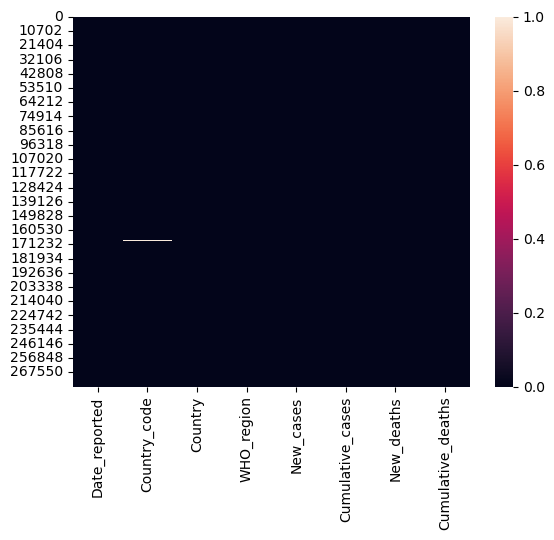

In [3]:
sns.heatmap(corona.isnull())#yticklabels=False)


Only country code column has NaN values

In [4]:
k=corona['Country_code']
k[k.isnull()].index

Int64Index([167882, 167883, 167884, 167885, 167886, 167887, 167888, 167889,
            167890, 167891,
            ...
            169046, 169047, 169048, 169049, 169050, 169051, 169052, 169053,
            169054, 169055],
           dtype='int64', length=1174)

there are 1174 rows with NaN values

In [5]:
corona.loc[169055]

Date_reported        2023-03-21
Country_code                NaN
Country                 Namibia
WHO_region                 AFRO
New_cases                     0
Cumulative_cases         171208
New_deaths                    0
Cumulative_deaths          4090
Name: 169055, dtype: object

In [6]:
corona.Country_code.unique()

array(['AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW',
       'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ',
       'BM', 'BT', 'BO', 'XA', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF',
       'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'KP',
       'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE',
       'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM',
       'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG',
       'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR',
       'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE',
       'KI', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI',
       'LT', 'LU', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR',
       'MU', 'YT', 'MX', 'FM', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM',
       nan, 'NR', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE

The missing country code seems to be from country Namibia 

I will set the country code to NM 

There seems to be an empty Country code as well

In [7]:
corona.loc[167882:169055,'Country_code']='NM'
#co

for the empty country code

In [8]:
corona.groupby(['Country_code',corona.index]).sum()

New_cases  Cumulative_cases  New_deaths  \
Country_code                                                   
             185492          0                 0           0   
             185493          0                 0           0   
             185494          0                 0           0   
             185495          0                 0           0   
             185496          0                 0           0   
...                        ...               ...         ...   
ZW           278233          0            264391           0   
             278234          0            264391           0   
             278235          0            264391           0   
             278236          0            264391           0   
             278237          0            264391           0   

                     Cumulative_deaths  
Country_code                            
             185492                  0  
             185493                  0  
             185494                  0  
             185495                  0  
             185496                  0  
...                                ...  
ZW           278233               5672  
             278234               5672  
             278235               5672  
             278236               5672  
             278237               5672  

[278238 rows x 4 columns]

In [9]:
corona.loc[185492:186665,'Country']

185492    Other
185493    Other
185494    Other
185495    Other
185496    Other
          ...  
186661    Other
186662    Other
186663    Other
186664    Other
186665    Other
Name: Country, Length: 1174, dtype: object

In [10]:
corona.loc[185492:186665,'Country_code']= 'OTH'

I used OTH to represent OTHER COUNTRY code

<AxesSubplot:>

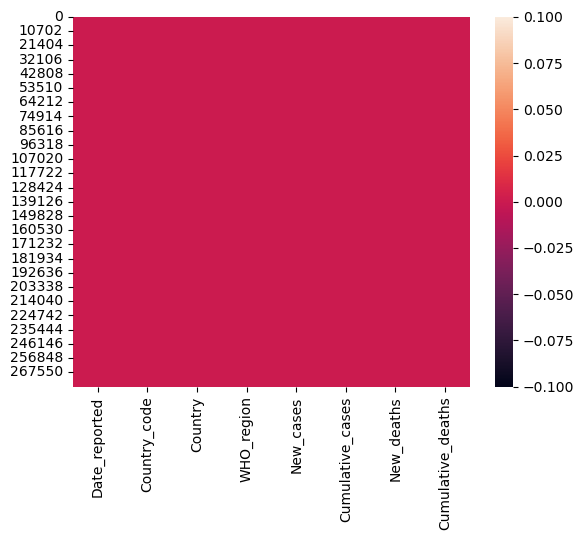

In [11]:
sns.heatmap(corona.isnull())#yticklabels=False)


obviously there are no more NaN values

In [12]:
#parse dates 
corona['Date_reported']=pd.to_datetime(corona['Date_reported'],format='%Y-%m-%d')
corona.Date_reported.dtype

dtype('<M8[ns]')

<AxesSubplot:title={'center':'Year with highest death and cases'}, xlabel='New_cases', ylabel='New_deaths'>

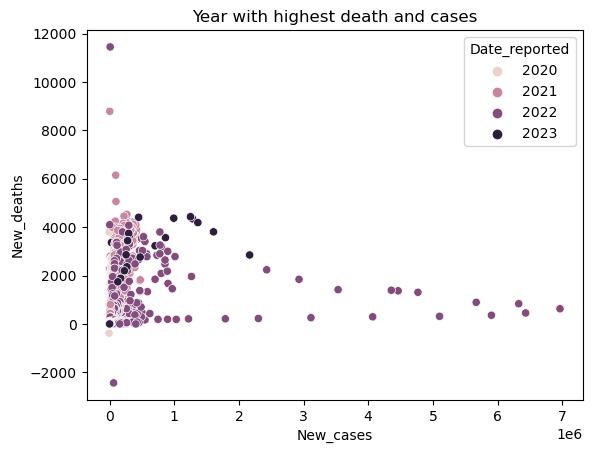

In [13]:
plt.title('Year with highest death and cases')
sns.scatterplot(hue=corona['Date_reported'].dt.year,y=corona['New_deaths'],x=corona['New_cases'])

From the scatterplot, Overall Highest number of deaths and cases was recorded in 2022

The dataset shows the daily records of cases and deaths in each country from 2020 January to 2023 March 

It therefore makes sense to group the data by year and also by country, to see the number of deaths and cases in each country per year

In [14]:
corona['year']= corona['Date_reported'].dt.year
N_data= corona['New_cases'].groupby([corona['year'],corona['Country']]).sum()
N_data

year  Country                                                 
2020  Afghanistan                                                 52330
      Albania                                                     57146
      Algeria                                                     99311
      American Samoa                                                  0
      Andorra                                                      7983
                                                                  ...  
2023  Wallis and Futuna                                               0
      Yemen                                                           0
      Zambia                                                       9054
      Zimbabwe                                                     4291
      occupied Palestinian territory, including east Jerusalem        0
Name: New_cases, Length: 948, dtype: int64

In [15]:
#
N2_data= corona['New_deaths'].groupby([corona['year'],corona['Country']]).sum()
N2_data

year  Country                                                 
2020  Afghanistan                                                 2189
      Albania                                                     1170
      Algeria                                                     2751
      American Samoa                                                 0
      Andorra                                                       84
                                                                  ... 
2023  Wallis and Futuna                                              0
      Yemen                                                          0
      Zambia                                                        34
      Zimbabwe                                                      35
      occupied Palestinian territory, including east Jerusalem       0
Name: New_deaths, Length: 948, dtype: int64

In [16]:
Joint= pd.concat([N_data,N2_data],axis=1)
Joint

New_cases  New_deaths
year Country                                                                  
2020 Afghanistan                                             52330        2189
     Albania                                                 57146        1170
     Algeria                                                 99311        2751
     American Samoa                                              0           0
     Andorra                                                  7983          84
...                                                            ...         ...
2023 Wallis and Futuna                                           0           0
     Yemen                                                       0           0
     Zambia                                                   9054          34
     Zimbabwe                                                 4291          35
     occupied Palestinian territory, including east ...          0           0

[948 rows x 2 columns]

In [17]:
Joint.idxmax()

New_cases                        (2022, China)
New_deaths    (2021, United States of America)
dtype: object

The United States in 2021 has the highest number of deaths recorded and China in 2021 has the highest number of Coronavirus cases recorded

In [18]:
Joint.idxmin()

New_cases     (2020, American Samoa)
New_deaths    (2020, American Samoa)
dtype: object

American Samoa in 2020 has the lowest number of cases and deaths recorded

<AxesSubplot:xlabel='New_cases', ylabel='New_deaths'>

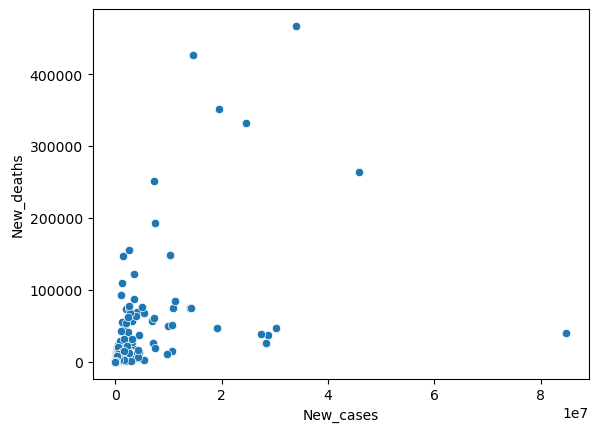

In [19]:
sns.scatterplot(x=Joint['New_cases'],y= Joint['New_deaths'])

<AxesSubplot:xlabel='New_cases', ylabel='New_deaths'>

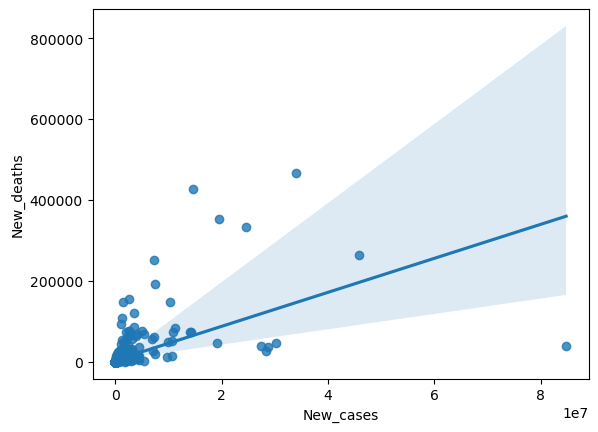

In [20]:
sns.regplot(data=Joint,x='New_cases',y= 'New_deaths')

Since the regression line shows a positive correlation between the two variables, For every increase in number of cases, there is also an increase in Number of deaths recorded